# Analyze and prepare the dataset for altpred experiments

### 1. Import the libraries

In [3]:
# This Source Code Form is subject to the terms of the MPL
# License. If a copy of the same was not distributed with this
# file, You can obtain one at
# https://github.com/akhilpandey95/altpred/blob/master/LICENSE.

import os
import random
import string
import spacy as sp
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

### 2. Read the data

#### 2.1 Read the complete dataset as a dataframe

In [13]:
# read the complete dataset
data = pd.read_csv("../pubundsci/combined_dataset_charlie.csv", index_col=0)

/Users/akhil/.pyenv/versions/jupyter/lib/python3.6/site-packages/numpy/lib/arraysetops.py:518: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### 2.2 Take a random sample (1%) of the dataset for the experiment

In [14]:
# take 1% fraction
data = data.sample(frac=0.01).reset_index(drop=True)

# reset the index once again
data = data.sample(frac=1).reset_index(drop=True)

# print the head of the dataset
data.head()

,altmetric_id,X.1,X,title,abstract,blog_post,similarity_score,yules_i_for_abs,yules_i_for_blg,avg_word_len_abs,...,altmetric_score_6m,altmetric_score_3m,altmetric_score_1m,altmetric_score_1w,altmetric_score_6d,altmetric_score_5d,altmetric_score_4d,altmetric_score_3d,altmetric_score_3d.1,altmetric_score_1d
0,411791,324934,324933,“A Disease Like Any Other”? A Decade of Change...,Clinicians advocates and policy makers have pr...,Researchers recently completed a first of its ...,0.039185,76.000000,64.222222,5.697674,...,18.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,4359327,165194,165193,Psychodynamic therapy meets evidence-based med...,Psychodynamic therapy (PDT) is an umbrella con...,Sometimes authors misapply principles of evide...,0.005870,21.045956,111.363636,6.106061,...,14.200,12.700,2.7,2.7,2.7,2.7,1.7,1.7,0.0,NaN
2,2397894,77342,77341,Experimental evidence of massive-scale emotion...,Emotional states can be transferred to others ...,Altmetric's annual top 100 list provides an op...,0.000000,27.971223,69.444444,6.263441,...,211.974,119.462,10.0,10.0,7.0,7.0,7.0,7.0,0.0,NaN
3,377219,19703,19702,Vitamin C for preventing and treating the comm...,The role of vitamin C (ascorbic acid) in the p...,Think those extra vitamins can&#8217;t be doin...,0.063889,28.033333,27.173913,4.473684,...,19.728,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,465454,349400,349399,Costs of Health Care Administration in the Uni...,A decade ago the administrative costs of healt...,The recent analysis by Pricewaterhouse Cooper&...,0.063510,20.930233,96.333333,5.829268,...,34.000,34.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


#### 2.3 Convert to a csv file

In [16]:
data.to_csv("sampled_dataset_alpha.csv", sep = ',', encoding="utf-8")

### 3. Visualize the target variable

#### 3.1 Scatter plots of the altmetric scores observed for articles with age of 1 day, 3 day and 4 days

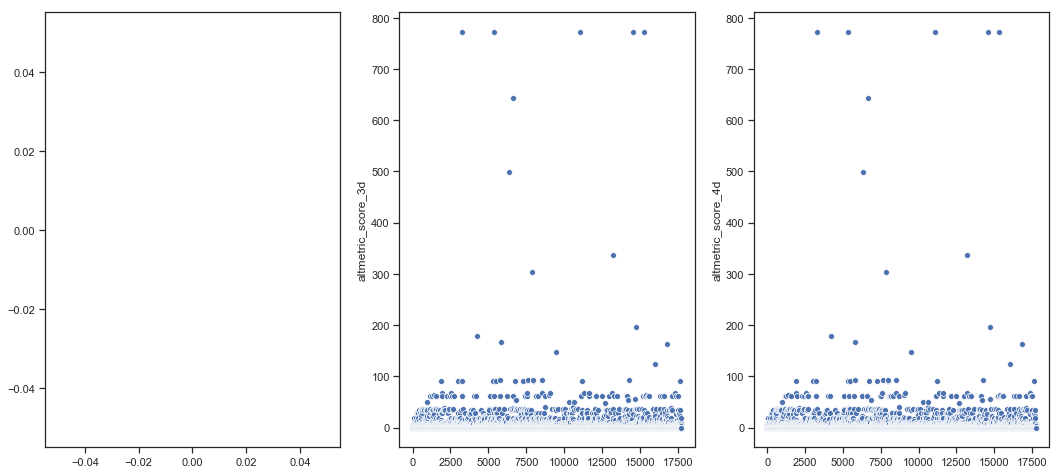

In [45]:
# set the sns style as ticks
sns.set(style='ticks')

# create the figure and axes for the subplot
f, axes = plt.subplots(1, 3, figsize=(18,8))

# load the scatterplot matrix for the 1 day target variable
sns.scatterplot(y='altmetric_score_1d', x=list(range(len(data))) ,data=data, ax=axes[0])

# load the scatter plot matrix for the 3 day target variable
sns.scatterplot(y='altmetric_score_3d', x=list(range(len(data))) ,data=data, ax=axes[1])

# load the scatter plot matrix for the 4 day target variable
sns.scatterplot(y='altmetric_score_4d', x=list(range(len(data))) ,data=data, ax=axes[2])

#### 3.2 Scatter plots of the altmetric scores observed for articles with age of 6 days, 1 week and 1 month

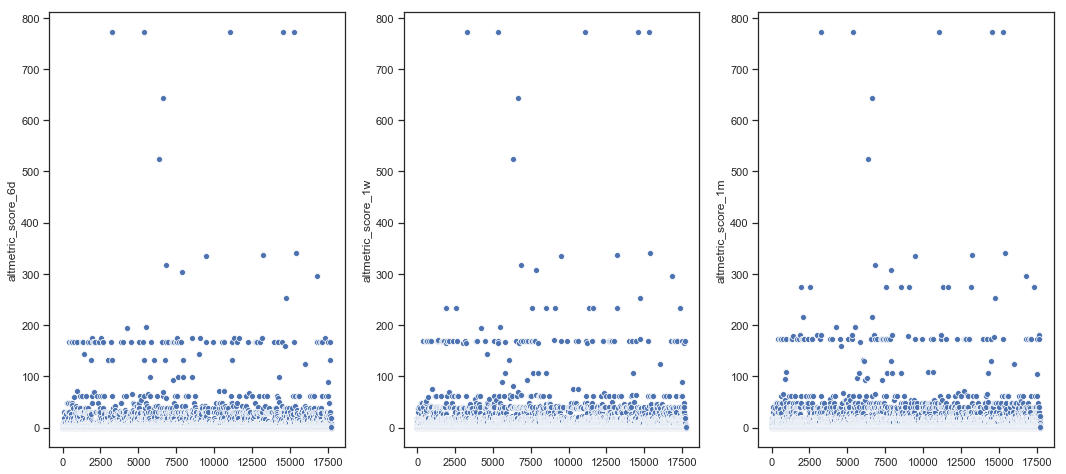

In [47]:
# set the sns style as ticks
sns.set(style='ticks')

# create the figure and axes for the subplot
f, axes = plt.subplots(1, 3, figsize=(18,8))

# load the scatterplot matrix for the 6 days target variable
sns.scatterplot(y='altmetric_score_6d', x=list(range(len(data))) ,data=data, ax=axes[0])

# load the scatter plot matrix for the 1 week target variable
sns.scatterplot(y='altmetric_score_1w', x=list(range(len(data))) ,data=data, ax=axes[1])

# load the scatter plot matrix for the 1 month target variable
sns.scatterplot(y='altmetric_score_1m', x=list(range(len(data))) ,data=data, ax=axes[2])

#### 3.3 Scatter plots of the altmetric scores observed for articles with age of 3 months, 6 months and 1 year

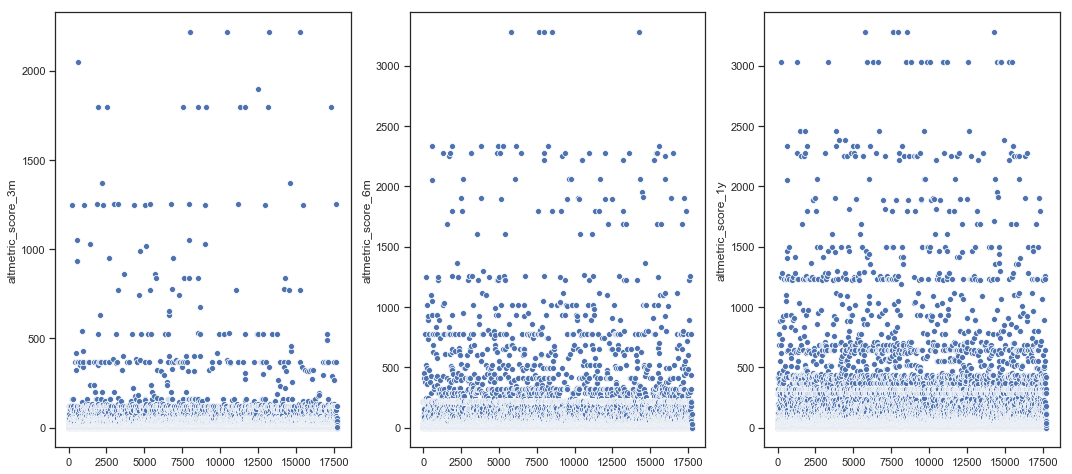

In [36]:
# set the sns style as ticks
sns.set(style='ticks')

# create the figure and axes for the subplot
f, axes = plt.subplots(1, 3, figsize=(18,8))

# load the scatterplot matrix for the 3 month target variable
sns.scatterplot(y='altmetric_score_3m', x=list(range(len(data))) ,data=data, ax=axes[0])

# load the scatter plot matrix for the 6 months target variable
sns.scatterplot(y='altmetric_score_6m', x=list(range(len(data))) ,data=data, ax=axes[1])

# load the scatter plot matrix for the 1 year target variable
sns.scatterplot(y='altmetric_score_1y', x=list(range(len(data))) ,data=data, ax=axes[2])

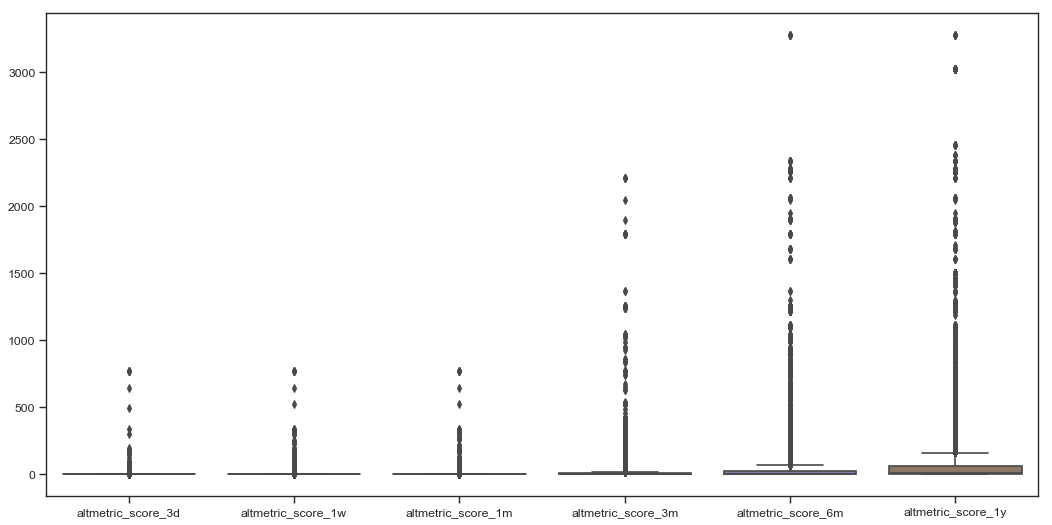

In [64]:
figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# create a boxplot for all the features
sns.boxplot(data=data.iloc[:, [
    data.columns.get_loc('altmetric_score_3d'),
    data.columns.get_loc('altmetric_score_1w'),
    data.columns.get_loc('altmetric_score_1m'),
    data.columns.get_loc('altmetric_score_3m'),
    data.columns.get_loc('altmetric_score_6m'), 
    data.columns.get_loc('altmetric_score_1y')]])

In [65]:
data.columns

Index(['altmetric_id', 'X.1', 'X', 'title', 'abstract', 'blog_post',
       'similarity_score', 'yules_i_for_abs', 'yules_i_for_blg',
       'avg_word_len_abs', 'avg_sen_len_abs',
       'freq_of_words_great_sent_len_abs', 'avg_word_len_blg',
       'avg_sen_len_blg', 'freq_of_words_great_sent_len_blg',
       'bigrams_abs_blg', 'trigrams_abs_blg', 'mendeley_readers',
       'citeulikereaders', 'connoteareaders', 'blog_users',
       'blogs_posts_count', 'news_unique_users', 'total_posts_count',
       'wiki_posts_count', 'facebook_users', 'facebook_posts', 'twitter_users',
       'twitter_posts', 'citation_page', 'other_articles', 'mean', 'rank',
       'perc', 'scored_higher_than', 'sample_size', 'users_lecturer',
       'users_librarian', 'users_student_bachelor', 'users_student_master',
       'users_student_pg', 'users_student_phd', 'users_student_doct',
       'users_researcher', 'users_other', 'users_prof_assoc', 'users_prof',
       'users_medi', 'users_ss', 'users_psych', 'use